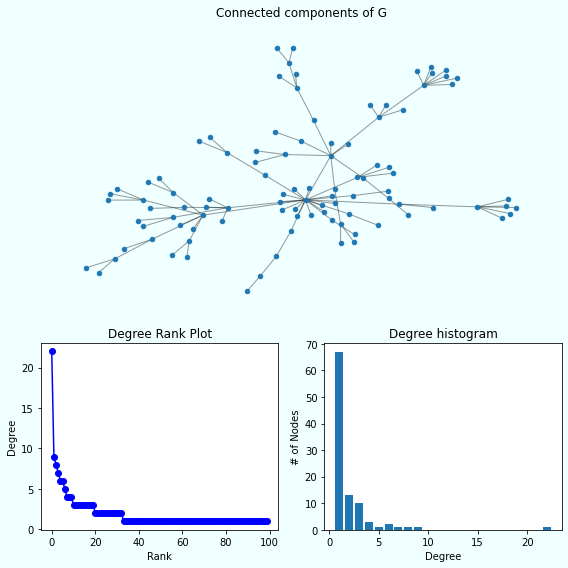

In [13]:
from ba import BAModel
bamodel=BAModel(2)
bamodel.ba_run(1,100)
bamodel.draw()

not converged


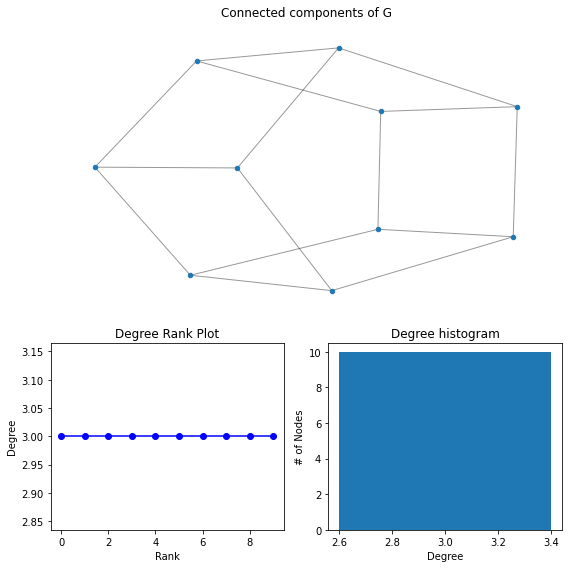

In [3]:
from grover import Grover
from qba import QBA
import plot
import write
from networkx import DiGraph
PATH=[(0,0.),(1,1.)]
MAX=1
N=5
# G=Grover([])
# G.complete_graph(N)
# G.grover(MAX,PATH)
# G.arc_plot()
# G=Grover([])
# G.complete_graph(N)
# G.matrix_grover(MAX,PATH)
# G.arc_plot()
qba=QBA().build_circular_ladder_graph(N,PATH)
qba.grover(MAX)
plot.deg_plot(DiGraph(qba.arcs))
#write.write_for_csv(qba,PATH)

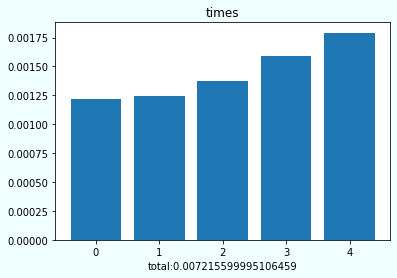

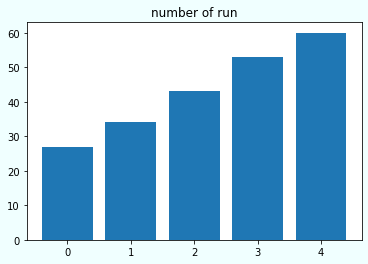

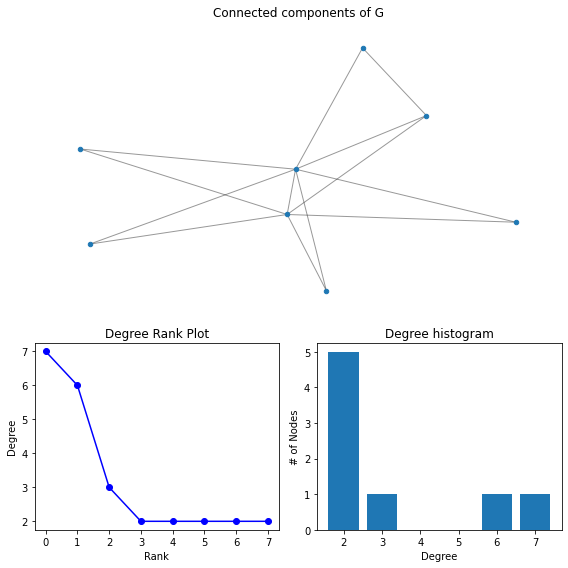

In [1]:
# import matplotlib.pyplot as plt
# import numpy as np
# import time
# import plot
# from grover import Grover
# PATH=[(0,1.),(1,-1.)]
# G=Grover([])
# G.complete_graph(3)
# times=[]
# for _ in range(5):
#     time_sta = time.perf_counter()
#     # G.grover(100000,PATH)
#     G.matrix_grover(100000,PATH)
#     G.qba_run(2,PATH)
#     time_end = time.perf_counter()
#     times.append(time_end-time_sta)
# plot.plot_time(times)
# G.make_count_histgram()
# G.deg_plot()

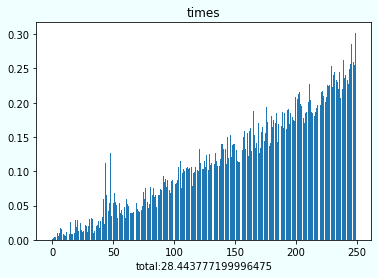

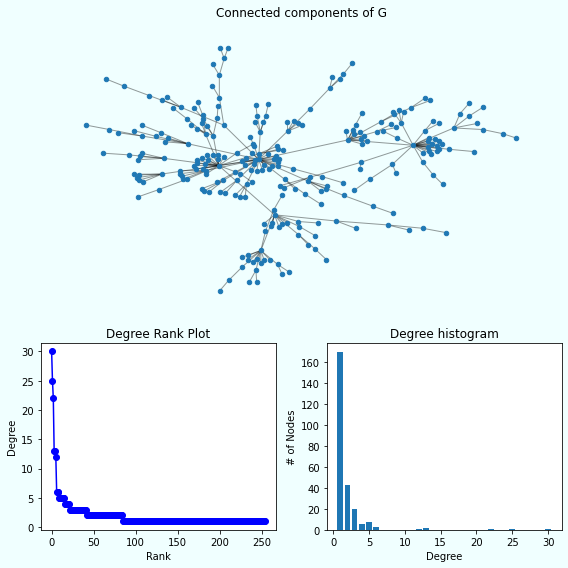

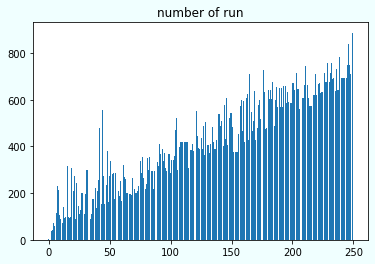

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import time
import plot
from qba import QBA
PATH=[(0,1.),(4,0.)]
# qba=QBA().build_comp_graph(3,PATH)
qba=QBA().build_path_graph(5,PATH)
qba.run_qba(250,5000)

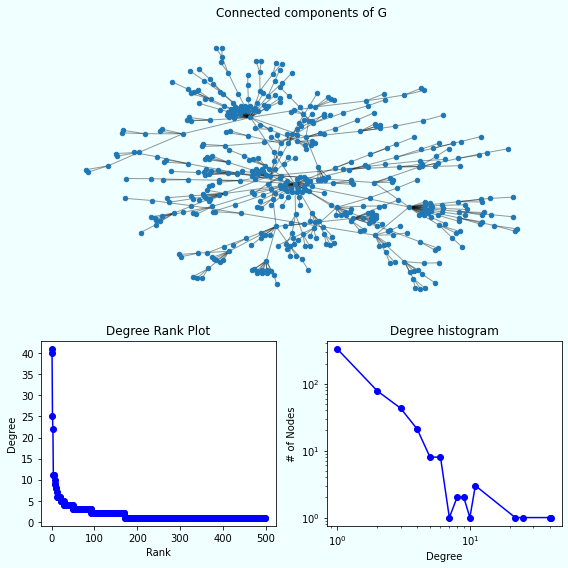

In [5]:
from ba import BAModel
bamodel=BAModel(2)
bamodel.ba_run(1,500)
bamodel.draw()

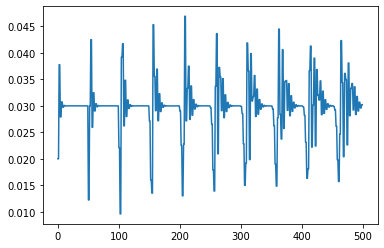

In [30]:
from qba import QBA
import numpy as np

PATH=[]
num_of_v=50
qba=QBA().build_circuit_graph(num_of_v,PATH)
qba.deg=np.append(qba.deg,1)
qba.deg[0]+=1
# print(qba.deg)
qba.arcs.extend([(0,num_of_v),(num_of_v,0)])
qba.weights = np.zeros(len(qba.arcs))
#qba.arc_plot()
for i in range(len(qba.arcs)-2):
    qba.weights[i]=1.
qba.non_flow_grover(500)
qba.plot_origin_prob()